File data/ecorp_price.csv provides the daily equity price of E-Corp from January 1 through December 31.  This price-equity curve contains several continuous price drops: sequences between a local price maximum and a subsequent local price minimum in which the price is either falling or staying fixed. The magnitude of a price drop is the difference in the price at the local maximum minus the price at the local minimum.  

- Write an algorithm to identify a) the magnitudes of the two largest price drops and b) the start and end dates of these two price drop sequences.
- Discuss the time complexity of your algorithm.  
- Are there any ways your algorithm might be improved?

,price
0,684.000000
1,701.880159
2,719.760318
3,731.947946
4,727.894290


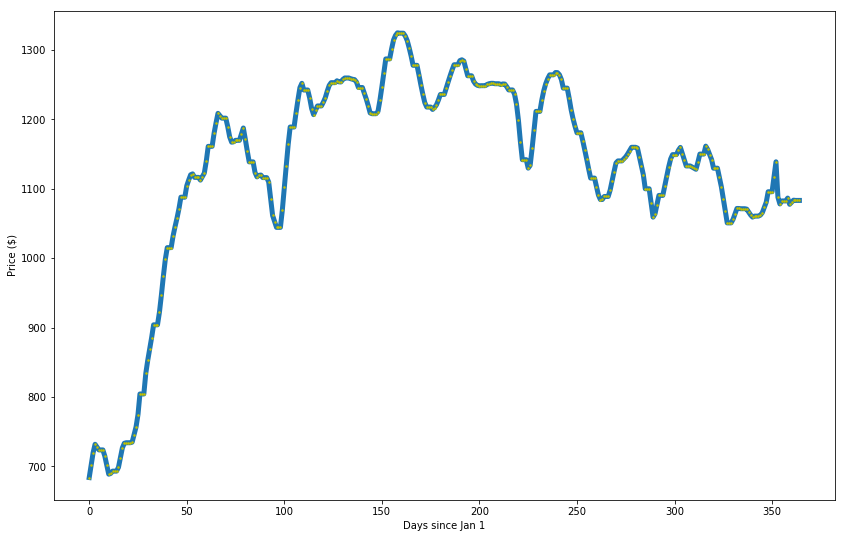

In [1]:
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

ecorp = pd.read_csv("data/ecorp_price.csv")

display(ecorp.head())

plt.figure(figsize=(14,9))
plt.plot(ecorp.index,ecorp.price,ls='-', lw=5, marker='.', ms=3, mec='y', mfc='y')
plt.xlabel('Days since Jan 1')
plt.ylabel('Price ($)')

In [ ]:
Answers to the questions above as follows:

In [82]:
import pandas as pd
df=pd.read_csv('/Users/username/Desktop/data_science_interviews/data/ecorp_price.csv')
df.head()

,price,date_det
0,684.000000,1-Jan
1,701.880159,2-Jan
2,719.760318,3-Jan
3,731.947946,4-Jan
4,727.894290,5-Jan


In [83]:
#Global minima
df['price'].min()

684.0

In [58]:
#Global Maxima
df['price'].max()

1324.7804890545578

In [15]:
#To check how many values are in the dataframe
len(df)

365

In [16]:
#Converting the values of the column: 'price' to a list of values after rounding the values to 2 decimal places
data=round(df['price'], 2).tolist()

In [17]:
data[:10]#Now data is just an array of float values

[684.0, 701.88, 719.76, 731.95, 727.89, 723.84, 723.84, 723.84, 714.89, 701.87]

In [85]:
date_details=df['date_det'].tolist()

In [137]:
#Write an algorithm to identify a) the magnitudes of the two largest price drops
#pseudo:
#loop through the given array to:
#Find local maxima - a point can be considered as maxima if it is greater than its previous value and its next value
#Find local minima - just the opposite of the strategy used in finding local maxima, i.e., a minima is a point that is
#lesser than its previous 
#find the difference between corresponding maxima and minima to find the price drop


def profit_curve(A, d):
    minima=[]
    maxima=[]
    minima_det=[]
    price_drop=[]
    maxima_det=[]
    for i in range(1, len(A)-1):        
        if A[i]<A[i-1] and A[i]<A[i+1]:
            minima_det.append((A.index(A[i]), A[i], d[i]))#local minima: contains index, values, and corresponding dates
            minima.append(A[i])#contains only values 
        elif A[i]>A[i+1] and A[i]>A[i-1]:
            maxima_det.append((A.index(A[i]), A[i], d[i]))#local maxima: contains index, values, and corresponding dates
            maxima.append(A[i])#contains only values
        else:
            continue
    
    minima.insert(0,684.0)#including the global minimum in the array
    minima_det.insert(0, (0, 684.0, '1-Jan'))

    for item in range(len(maxima)):#as length of both maxima and minima is the same, looping through the length of either one
        price_drop.append((round(maxima[item]-minima[item], 2), (minima_det[item][2], maxima_det[item][2])))

    
    return sorted(price_drop, reverse=True)[:2]


In [138]:
#the result for the magnitudes of the two largest price drops
profit_curve(data, date_details)

[(432.67, ('11-Jan', '23-Feb')), (137.78, ('14-Aug', '28-Aug'))]

In [ ]:
Discuss the time complexity of your algorithm

The time complexity of my algorithm is O(N) as the algorithm loops through the length of the given array.
Although sorted also iterates through the array price_drop, the length of the given array(A) will be bigger than that of price_drop.

In [ ]:
Are there any ways your algorithm might be improved?

In order to get the local maxima and local minima it is necessary to loop through the length of the given array and so the time complexity
can not be reduced (Although I would have liked to reduce the time complexity) for the case in point.

But I would like to improve it in terms of using fewer data structures (in order to be space efficient) and for loops.

A difference value or delta can be used as threshold in defining what points to be considered as maxima and minima.